<a href="https://colab.research.google.com/github/Nishantthakurrr/Sales-Data-Analysis/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install pyarrow

###Questions:-
1. How to read Feather data in the Colab Notebook?
2. How to remove duplicates and clean the data?
3. What is the best month for Sale?
4. Which city have maximum order?


In [2]:
# Mounted Google Drive to fetch the data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the .ftr filr using Pandas
Sales_data=pd.read_feather('/content/drive/MyDrive/Colab Notebooks/Sales_data (1).ftr')

Sales_data.head(11)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [4]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
# Sum of null values in the dataset..

Sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
# The dataset includes six columns and lakhs of order data..

Sales_data.shape

(186850, 6)

In [7]:
# This will help to change the entire data

Sales_data=Sales_data.dropna(how="all")

In [8]:
# All the null values are dropped

Sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
# The number of duplicates presented in the
Sales_data.duplicated().sum()

618

In [10]:
# You can check the duplicate rows in the below

Sales_data[Sales_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [11]:
#Drop all the duplicates

Sales_data.drop_duplicates()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [12]:
# Removed duplicates from the Dataset
Sales_data.shape

(186305, 6)

In [13]:
# All the unique valuse in the Product columns

Sales_data["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [14]:
# We will slpit the whole column for the getiing the moth from the data
"09/19/19 17:30".split(" ")[0].split("/")[0]

'09'

In [15]:
# This is the simpilar way to do the above
"09/19/19 17:30".split("/")[0]

'09'

In [16]:
# Creating a fucntion in python
def return_month(x):
  return x.split("/")[0]

In [17]:
# Creating the new column for month in the data set
Sales_data["Months"]=Sales_data["Order Date"].apply(return_month)

In [18]:

Sales_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04


In [19]:
Sales_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Months              object
dtype: object

In [20]:
Sales_data["Months"].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [21]:
filter2=Sales_data["Months"]=="Order Date"
filter2


0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Months, Length: 186305, dtype: bool

In [22]:
# Rows that have months as an "order date"

Sales_data[filter2], len(Sales_data[filter2])

(        Order ID  Product  Quantity Ordered  Price Each  Order Date  \
 519     Order ID  Product  Quantity Ordered  Price Each  Order Date   
 1149    Order ID  Product  Quantity Ordered  Price Each  Order Date   
 1155    Order ID  Product  Quantity Ordered  Price Each  Order Date   
 2878    Order ID  Product  Quantity Ordered  Price Each  Order Date   
 2893    Order ID  Product  Quantity Ordered  Price Each  Order Date   
 ...          ...      ...               ...         ...         ...   
 185164  Order ID  Product  Quantity Ordered  Price Each  Order Date   
 185551  Order ID  Product  Quantity Ordered  Price Each  Order Date   
 186563  Order ID  Product  Quantity Ordered  Price Each  Order Date   
 186632  Order ID  Product  Quantity Ordered  Price Each  Order Date   
 186738  Order ID  Product  Quantity Ordered  Price Each  Order Date   
 
         Purchase Address      Months  
 519     Purchase Address  Order Date  
 1149    Purchase Address  Order Date  
 1155    Purch

In [23]:
# Creating a Dataset with filtering the"Order Date" from the month column

Sales_data=Sales_data[~filter2]
Sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [24]:
Sales_data["Months"]=Sales_data["Months"].astype("int32")

In [25]:
# Data Type is changed
Sales_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Months               int32
dtype: object

In [26]:
Sales_data["Price Each"].unique(), Sales_data["Quantity Ordered"].unique()

(array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
        '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
        '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
        '400.0'], dtype=object),
 array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object))

In [27]:
Sales_data["Price Each"]=Sales_data["Price Each"].astype("float")
Sales_data["Quantity Ordered"]=Sales_data["Quantity Ordered"].astype("int32")

In [28]:
Sales_data["Total_Sales"]=Sales_data["Quantity Ordered"]*Sales_data["Price Each"]
Sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total_Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


(Months
 1     1822256.73
 2     2202022.42
 3     2807100.38
 4     3390670.24
 5     3152606.75
 6     2577802.26
 7     2647775.76
 8     2244467.88
 9     2097560.13
 10    3736726.88
 11    3199603.20
 12    4613443.34
 Name: Total_Sales, dtype: float64,
 <Axes: xlabel='Months'>)

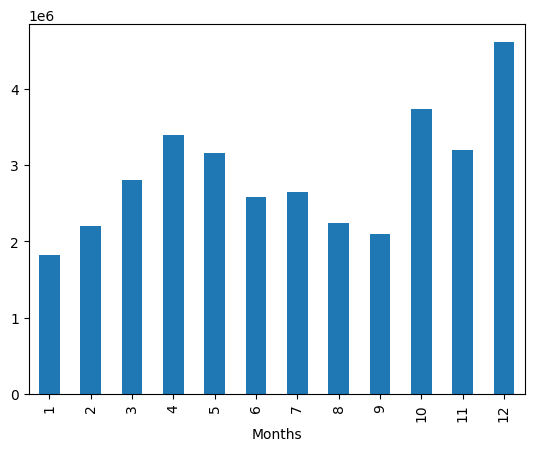

In [29]:
Sales_data.groupby(["Months"])["Total_Sales"].sum(), Sales_data.groupby(["Months"])["Total_Sales"].sum().plot(kind="bar", y="Total_Sales")

In [30]:
Sales_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total_Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99


In [35]:
#Sales_data["City"]=Sales_data["Purchase Address"].apply(lambda x:x.split(",")[1])

Sales_data["Purchase Address"][0].split(",")[1]

' Dallas'

In [40]:
Sales_data["Purchase Address"].str.split(",").str[1]

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Purchase Address, Length: 185950, dtype: object

In [42]:
Sales_data["city"]=Sales_data["Purchase Address"].str.split(",").str[1]

<Axes: xlabel='city'>

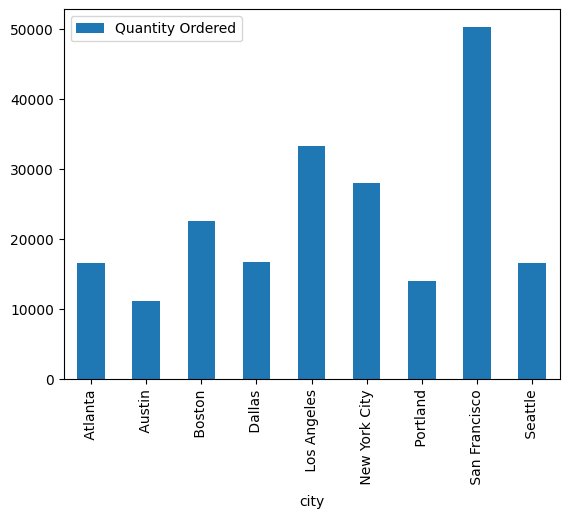

In [45]:
# City wise data of each city quantity ordered
Sales_data.pivot_table(index="city", values="Quantity Ordered", aggfunc="sum").plot(kind="bar")

<Axes: xlabel='Product'>

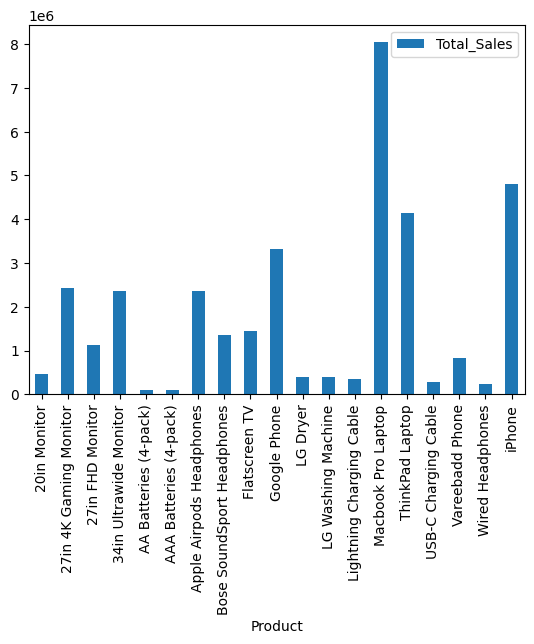

In [49]:
# Product with the most amount of sale

Sales_data.pivot_table(index="Product", values="Total_Sales", aggfunc="sum").plot(kind="bar")